In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

  ### Preprocessing

In [2]:
# Load data
import yfinance as yf

btcdata = yf.download("ETH-USD", start="2020-04-01", end="2022-04-07")
df = pd.DataFrame(btcdata)
df.drop(columns=['Adj Close'],inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-04-01,133.612320,135.634552,129.730942,135.634552,12456564435
2020-04-02,135.732178,146.787094,135.732178,142.029144,15322861686
2020-04-03,142.110458,146.899872,139.619385,142.091309,13184603402
2020-04-04,142.215179,145.377304,140.121826,145.219391,11946658257
2020-04-05,145.261017,146.128525,142.102081,143.546646,11280993591
...,...,...,...,...,...
2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,15333808649
2022-04-04,3522.364990,3535.148193,3422.000977,3521.241211,18209969743
2022-04-05,3521.239746,3546.706787,3410.547607,3411.792480,16681503199


In [3]:
df.shape



(737, 5)

In [4]:
df.iloc[552:737].Close

Date
2021-10-05    3518.518555
2021-10-06    3580.562012
2021-10-07    3587.974854
2021-10-08    3563.759277
2021-10-09    3575.716797
                 ...     
2022-04-03    3522.833496
2022-04-04    3521.241211
2022-04-05    3411.792480
2022-04-06    3171.691895
2022-04-07    3233.274658
Name: Close, Length: 185, dtype: float64

In [5]:
# Define features set
X = df.copy()
X.drop("Close", axis=1, inplace=True)
X.head()

,Open,High,Low,Volume
Date,,,,
2020-04-01,133.612320,135.634552,129.730942,12456564435
2020-04-02,135.732178,146.787094,135.732178,15322861686
2020-04-03,142.110458,146.899872,139.619385,13184603402
2020-04-04,142.215179,145.377304,140.121826,11946658257
2020-04-05,145.261017,146.128525,142.102081,11280993591


<AxesSubplot:xlabel='Date'>

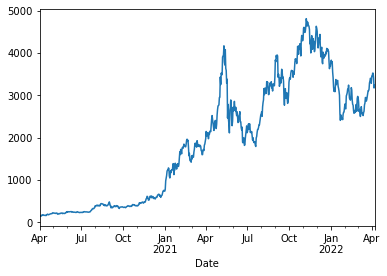

In [6]:
# Define target vector
y = df.Close
y.plot()

In [7]:
# Splitting into Train and Test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
pd.DataFrame(y_test)

,Close
Date,
2021-08-29,3227.002686
2021-08-30,3224.374268
2021-08-31,3433.732666
2021-09-01,3834.828125
2021-09-02,3790.989990
...,...
2022-04-03,3522.833496
2022-04-04,3521.241211
2022-04-05,3411.792480


  ### Choose best learning rate

In [9]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0
    )

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (train): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (test): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (train): 0.999
Accuracy score (test): 0.814

Learning rate:  0.1
Accuracy score (train): 0.999
Accuracy score (test): 0.813

Learning rate:  0.25
Accuracy score (train): 1.000
Accuracy score (test): 0.845

Learning rate:  0.5
Accuracy score (train): 1.000
Accuracy score (test): 0.730

Learning rate:  0.75
Accuracy score (train): 1.000
Accuracy score (test): 0.772

Learning rate:  1
Accuracy score (train): 1.000
Accuracy score (test): 0.703



  ### Create Gradient Boosting Classifier

In [10]:
# Choose a learning rate and create classifier
gradientBoostingRegressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.25,
    max_features=2,
    max_depth=3,
    random_state=0
)

# Fit the model
gradientBoostingRegressor.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = gradientBoostingRegressor.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,3238.856440,3227.002686
1,3262.571465,3224.374268
2,3431.522172,3433.732666
3,3613.933071,3834.828125
4,3684.329598,3790.989990
5,3860.969953,3940.614746
6,3919.906042,3887.828369
7,3915.588024,3952.133545
8,3915.588024,3928.379395
9,3668.391757,3426.394287


  ### Evaluate the model

In [11]:
# Calculating the accuracy score
# acc_score = accuracy_score(y_test, predictions)
# print(f"Accuracy Score : {acc_score}")


stocks = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": predictions.ravel()
    }, index = df.index[-len(y_test): ])
stocks.head(100)



,Real,Predicted
Date,,
2021-08-29,3227.002686,3238.856440
2021-08-30,3224.374268,3262.571465
2021-08-31,3433.732666,3431.522172
2021-09-01,3834.828125,3613.933071
2021-09-02,3790.989990,3684.329598
...,...,...
2021-12-02,4511.302246,3897.153525
2021-12-03,4220.706055,3910.083509
2021-12-04,4119.587402,3800.017344


<AxesSubplot:xlabel='Date'>

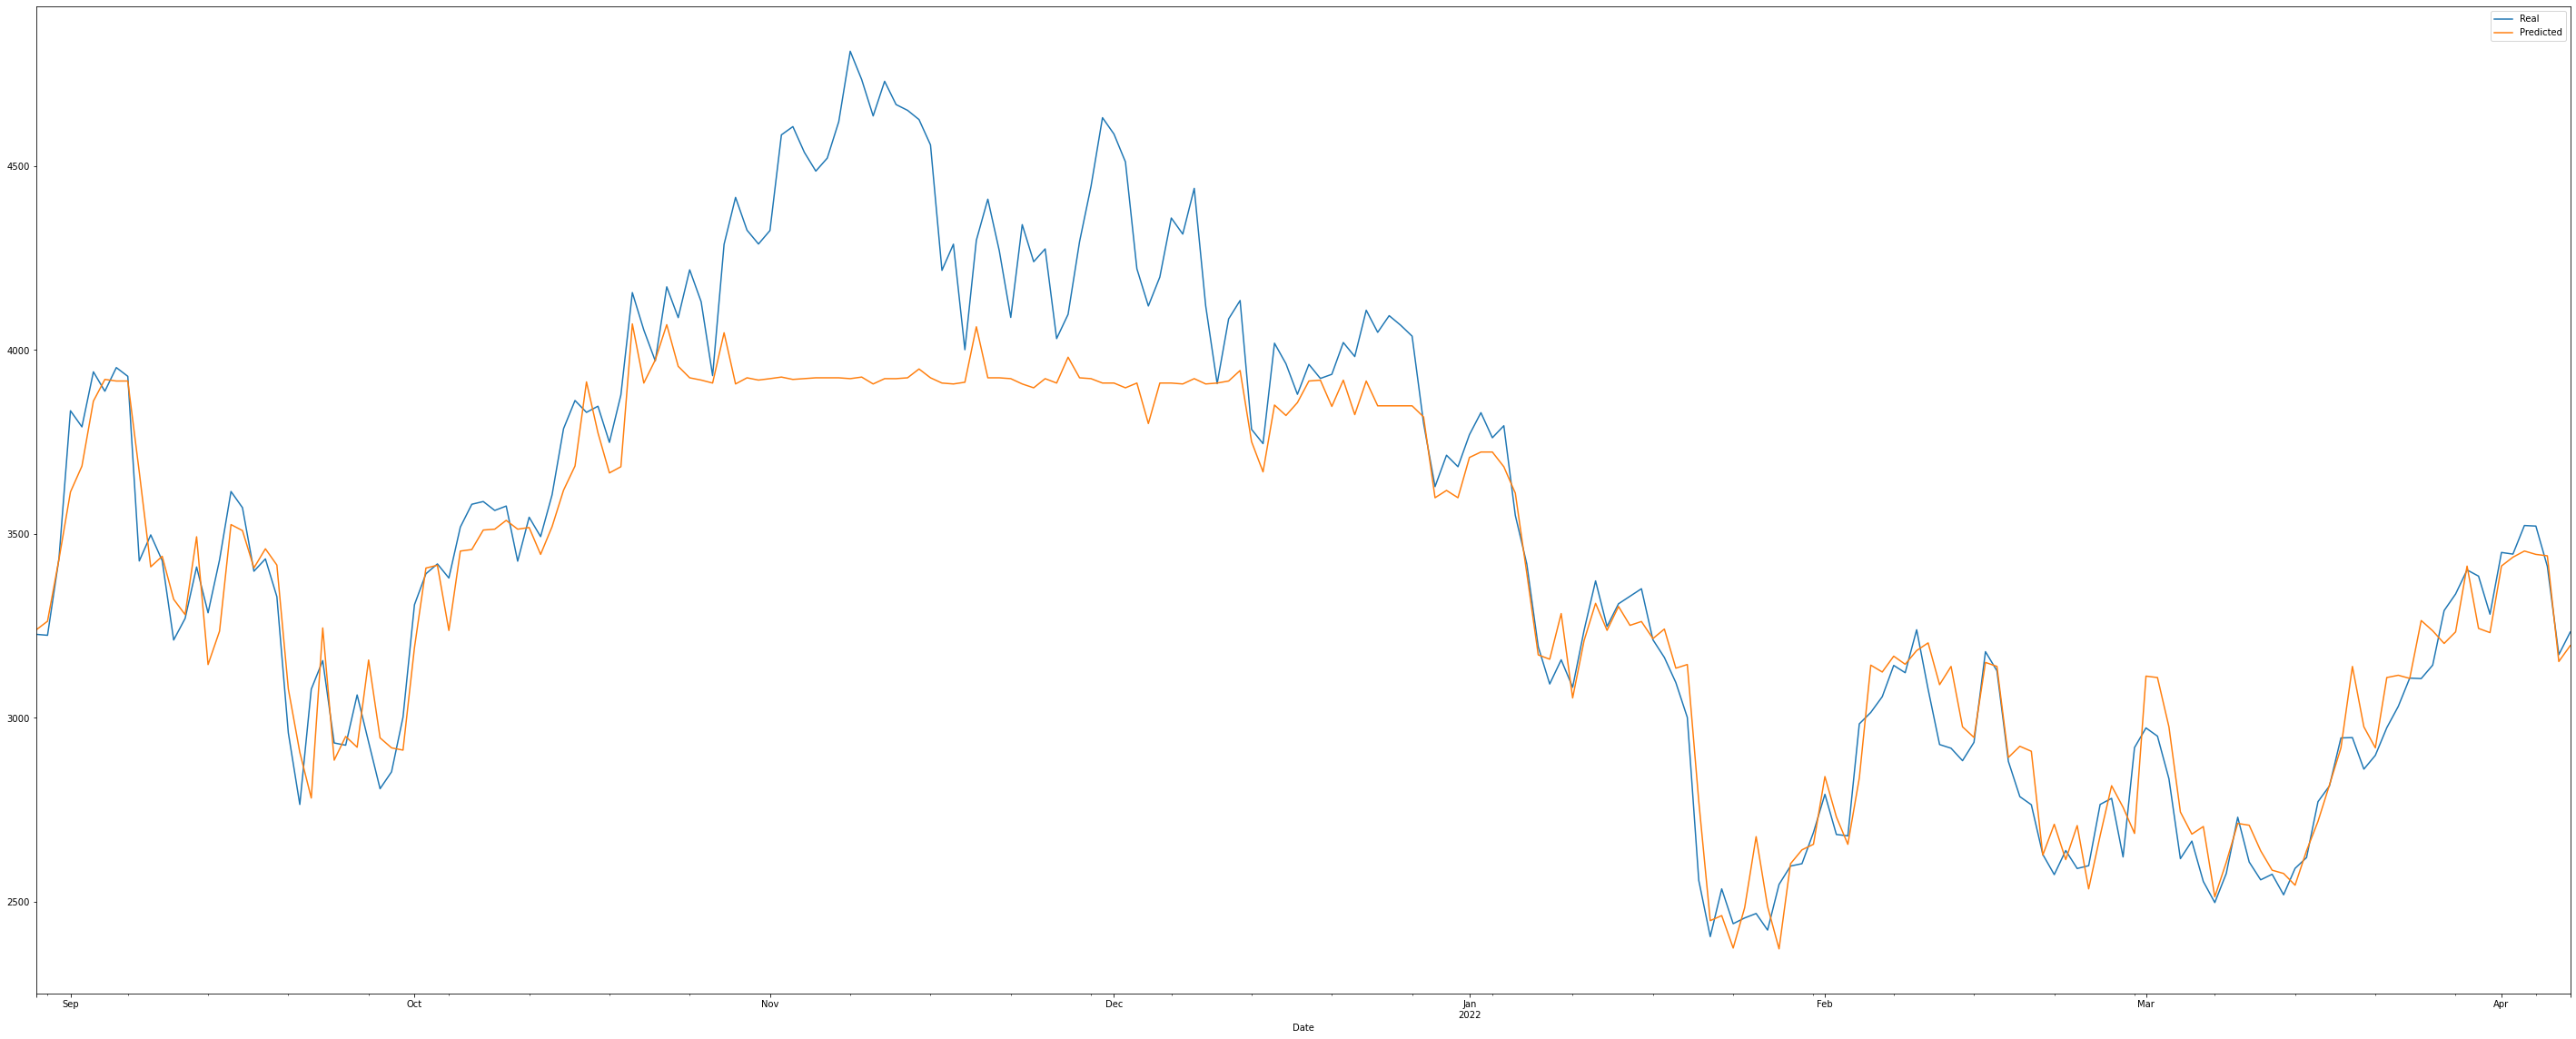

In [12]:
stocks.plot(figsize=(50, 20))